In [1]:
import numpy as np
#import librosa
#import extract_audiofeatures as ea

In [4]:
wav_in = '../sourcedata/data/HCP_7T_movie_FIX/stimuli/7T_MOVIE1_CC1_v2.wav'

In [5]:
y,sr,dur_10hz = ea.load_wav(wav_in)

In [6]:
dur_10hz

9210

In [9]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=1600)

In [10]:
chroma.shape

(12, 9211)

In [6]:
embed = np.load('../sourcedata/data/HCP_7T_movie_FIX/features/7T_MOVIE1_CC1_v2_as_embed.npy')
scores = np.load('../sourcedata/data/HCP_7T_movie_FIX/features/7T_MOVIE1_CC1_v2_as_scores.npy')

In [5]:
other = np.load('../sourcedata/data/HCP_7T_movie_FIX/features/7T_MOVIE1_CC1_v2_mfcc.npy')

In [37]:
scores = np.load('../sourcedata/data/HCP_7T_movie_FIX/features/7T_MOVIE1_CC1_v2_as_scores.npy')

In [38]:
scores_hrf = np.load('../sourcedata/data/HCP_7T_movie_FIX/features_hrf/7T_MOVIE1_CC1_v2_as_scores_hrf.npy')

In [39]:
scores.shape

(1918, 521)

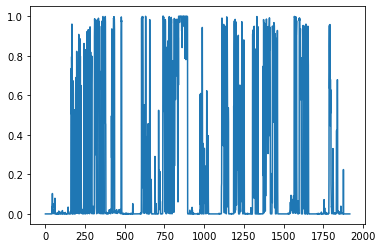

In [42]:
plt.plot(scores[:,0])

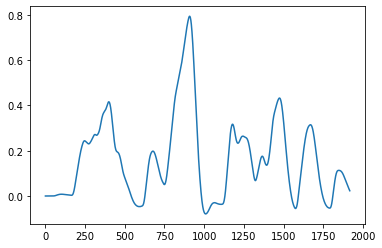

In [43]:
plt.plot(scores_hrf[:,0])

In [28]:
scores_hrf.shape

(521, 1918)

In [15]:


def resample_1hz(feat_in):
    feat_in = feat_in[:,::10] 
    return feat_in

# SPM's HRF
def spm_hrf_compat(t,
                   peak_delay=6,
                   under_delay=16,
                   peak_disp=1,
                   under_disp=1,
                   p_u_ratio = 6,
                   normalize=True,
                  ):
    """ SPM HRF function from sum of two gamma PDFs

    This function is designed to be partially compatible with SPMs `spm_hrf.m`
    function.

    The SPN HRF is a *peak* gamma PDF (with location `peak_delay` and dispersion
    `peak_disp`), minus an *undershoot* gamma PDF (with location `under_delay`
    and dispersion `under_disp`, and divided by the `p_u_ratio`).

    Parameters
    ----------
    t : array-like
        vector of times at which to sample HRF
    peak_delay : float, optional
        delay of peak
    peak_disp : float, optional
        width (dispersion) of peak
    under_delay : float, optional
        delay of undershoot
    under_disp : float, optional
        width (dispersion) of undershoot
    p_u_ratio : float, optional
        peak to undershoot ratio.  Undershoot divided by this value before
        subtracting from peak.
    normalize : {True, False}, optional
        If True, divide HRF values by their sum before returning.  SPM does this
        by default.

    Returns
    -------
    hrf : array
        vector length ``len(t)`` of samples from HRF at times `t`

    Notes
    -----
    See ``spm_hrf.m`` in the SPM distribution.
    """
    if len([v for v in [peak_delay, peak_disp, under_delay, under_disp]
            if v <= 0]):
        raise ValueError("delays and dispersions must be > 0")
    # gamma.pdf only defined for t > 0
    hrf = np.zeros(t.shape, dtype=np.float)
    pos_t = t[t > 0]
    peak = gamma.pdf(pos_t,
                         peak_delay / peak_disp,
                         loc=0,
                         scale=peak_disp)
    undershoot = gamma.pdf(pos_t,
                               under_delay / under_disp,
                               loc=0,
                               scale=under_disp)
    hrf[t > 0] = peak - undershoot / p_u_ratio
    if not normalize:
        return hrf
    return hrf / np.max(hrf)

In [17]:
from scipy.stats import gamma
rms = np.load('../sourcedata/data/HCP_7T_movie_FIX/features/7T_MOVIE1_CC1_v2_rms.npy')

In [22]:
def apply_optimal_hrf_10hz(feat_in):
    #applies optimal hrf from merlin study to a 10hz feature 
    t=np.arange(320)
    optimal_hrf=spm_hrf_compat(t,
                   peak_delay=60,
                   under_delay=180,
                   peak_disp=14,
                   under_disp=15,
                   p_u_ratio = 4,
                   normalize=False,)
    n_to_remove = optimal_hrf.shape[0]-1 #how much to trim from end after convolution
    for m in np.arange(feat_in.shape[1]):
        feat_in[:,m]=np.convolve(feat_in[:,m], optimal_hrf)[:-n_to_remove]
    return feat_in


rms_out=apply_optimal_hrf_10hz(rms)

<ipython-input-15-a7fc75ff66bd>:70: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  hrf = np.zeros(t.shape, dtype=np.float)


In [23]:
rms.shape[1]

9211

In [12]:
rms_hrf = np.load('../sourcedata/data/HCP_7T_movie_FIX/features_hrf/7T_MOVIE1_CC1_v2_rms_hrf.npy')

In [13]:
rms_hrf.shape

(1, 922)

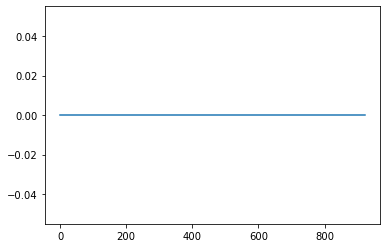

In [14]:
plt.plot(rms_hrf[0,:])

In [25]:
other.shape

(13, 9211)

In [3]:
embed.shape

(1918, 1024)

In [3]:
from matplotlib import pyplot as plt

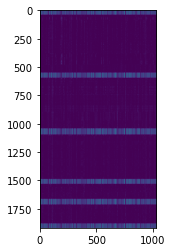

In [5]:
plt.imshow(embed)

In [15]:
scores.shape

(1918, 521)

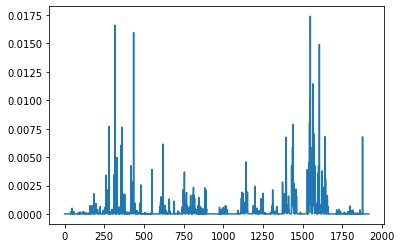

In [23]:
plt.plot(scores[:,5])

In [12]:
class_names = np.load('/om2/user/jsmentch/data/yamnet_output/yamnet_class_names.npy')


In [13]:
class_names

array(['Speech', 'Child speech, kid speaking', 'Conversation',
       'Narration, monologue', 'Babbling', 'Speech synthesizer', 'Shout',
       'Bellow', 'Whoop', 'Yell', 'Children shouting', 'Screaming',
       'Whispering', 'Laughter', 'Baby laughter', 'Giggle', 'Snicker',
       'Belly laugh', 'Chuckle, chortle', 'Crying, sobbing',
       'Baby cry, infant cry', 'Whimper', 'Wail, moan', 'Sigh', 'Singing',
       'Choir', 'Yodeling', 'Chant', 'Mantra', 'Child singing',
       'Synthetic singing', 'Rapping', 'Humming', 'Groan', 'Grunt',
       'Whistling', 'Breathing', 'Wheeze', 'Snoring', 'Gasp', 'Pant',
       'Snort', 'Cough', 'Throat clearing', 'Sneeze', 'Sniff', 'Run',
       'Shuffle', 'Walk, footsteps', 'Chewing, mastication', 'Biting',
       'Gargling', 'Stomach rumble', 'Burping, eructation', 'Hiccup',
       'Fart', 'Hands', 'Finger snapping', 'Clapping',
       'Heart sounds, heartbeat', 'Heart murmur', 'Cheering', 'Applause',
       'Chatter', 'Crowd', 'Hubbub, speech noi